## Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

In [74]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
connection_string = 'sqlite:///hawaii.sqlite'
engine = create_engine(connection_string)

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['hawaii_data']

In [6]:
Hawaii = Base.classes.hawaii_data

In [7]:
session = Session(engine)

In [8]:
first_row = session.query(Hawaii).first()

In [9]:
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1081e04a8>,
 'date_format': datetime.datetime(2010, 1, 1, 0, 0),
 'day': 1,
 'elevation': 3,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'month': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65,
 'year': 2010}

In [17]:
inspector = inspect(engine)
columns = inspector.get_columns('hawaii_data')
for each in columns:
    print(each['name'], each['type'])

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation INTEGER
prcp FLOAT
tobs INTEGER
month INTEGER
day INTEGER
year INTEGER
date_format DATETIME


In [21]:
inspector.get_table_names()

['hawaii_data']

In [23]:
inspector.get_primary_keys('hawaii_data')

/Users/gta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SADeprecationWarning: Call to deprecated method get_primary_keys.  Use get_pk_constraint instead.
  """Entry point for launching an IPython kernel.


['id']

In [24]:
conn = engine.connect()

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

<center><img src='images/precip.png' /></center>

* Use Pandas to print the summary statistics for the precipitation data.

In [63]:
query = """
        select * 
        from hawaii_data 
        WHERE (date_format BETWEEN '2016-08-23 00:00:00.000000' AND '2017-08-23 00:00:00.000000')
        """

In [64]:
df_12 = pd.read_sql(query, conn)

In [65]:
df_12.shape

(2230, 12)

In [66]:
df_12.head()

,id,station,name,latitude,longitude,elevation,prcp,tobs,month,day,year,date_format
0,2364,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,81,8,23,2016,2016-08-23 00:00:00.000000
1,2365,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.08,79,8,24,2016,2016-08-24 00:00:00.000000
2,2366,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.08,80,8,25,2016,2016-08-25 00:00:00.000000
3,2367,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,79,8,26,2016,2016-08-26 00:00:00.000000
4,2368,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,77,8,27,2016,2016-08-27 00:00:00.000000


In [82]:
df_12_gb = df_12[['date_format', 'prcp']].groupby('date_format', as_index=False).sum()

In [83]:
df_12_gb.head()

,date_format,prcp
0,2016-08-23 00:00:00.000000,2.757846
1,2016-08-24 00:00:00.000000,9.377846
2,2016-08-25 00:00:00.000000,0.540000
3,2016-08-26 00:00:00.000000,0.100000
4,2016-08-27 00:00:00.000000,0.763960


In [84]:
df_12_gb.tail()

,date_format,prcp
361,2017-08-19 00:00:00.000000,0.189643
362,2017-08-20 00:00:00.000000,0.453960
363,2017-08-21 00:00:00.000000,0.679643
364,2017-08-22 00:00:00.000000,0.500000
365,2017-08-23 00:00:00.000000,0.530000


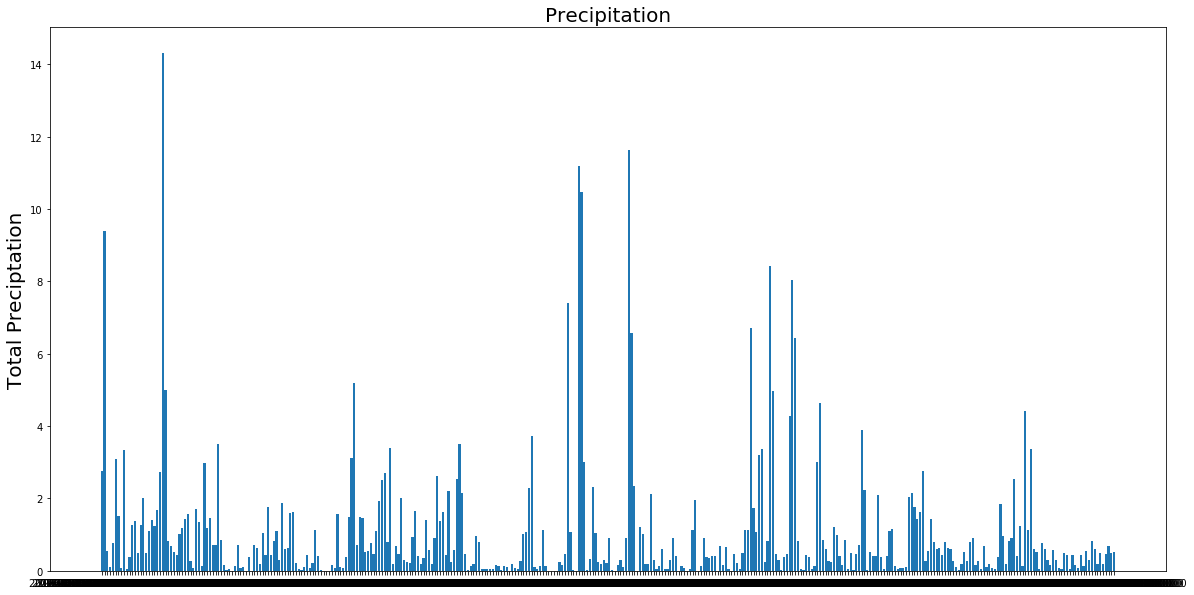

In [90]:
plt.figure(figsize = (20, 10))
plt.bar(df_12_gb['date_format'], df_12_gb['prcp'])
plt.ylabel('Total Preciptation', fontsize = 20)
plt.title('Precipitation', fontsize = 20)
plt.show()

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

  <center><img src='images/temp_hist.png' height="400px" /></center>

In [91]:
query = """
        select DISTINCT name 
        from hawaii_data
        """

In [93]:
df_station_name = pd.read_sql(query, conn)
df_station_name

,name
0,"WAIKIKI 717.2, HI US"
1,"KANEOHE 838.1, HI US"
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,"PEARL CITY, HI US"
4,"UPPER WAHIAWA 874.3, HI US"
5,"WAIMANALO EXPERIMENTAL FARM, HI US"
6,"WAIHEE 837.5, HI US"
7,"HONOLULU OBSERVATORY 702.2, HI US"
8,"MANOA LYON ARBO 785.2, HI US"


### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

<center><img src='images/temp_avg.png' height="400px"/></center>